# Roll No : RBT21CB018
# Name : SATISH PRASAD

# PRINCIPAL COMPONENT ANALYSIS

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv("Daily_wheat_price.csv")
df

,date,open,high,low,close
0,2018-03-12,488.50,492.75,483.00,490.00
1,2018-03-09,499.25,499.25,486.00,490.25
2,2018-03-08,497.50,502.50,490.25,499.25
3,2018-03-07,506.00,509.75,496.00,497.50
4,2018-03-06,507.00,507.50,495.50,506.00
...,...,...,...,...,...
2267,2009-10-19,497.50,522.63,497.50,517.50
2268,2009-10-18,497.50,497.50,497.50,497.50
2269,2009-10-16,505.38,506.63,495.63,497.75
2270,2009-10-15,513.50,513.63,496.50,505.38


In [3]:
features = ['open','high','low','close'] # x values
x = df.drop(columns='date',axis=1)
y = df["date"]

In [4]:
x = StandardScaler(). fit_transform(x)
x

array([[-0.77527378, -0.78704769, -0.7731021 , -0.76188928],
       [-0.69584588, -0.73971665, -0.75056379, -0.7600405 ],
       [-0.708776  , -0.71605113, -0.71863451, -0.69348452],
       ...,
       [-0.6505535 , -0.68597771, -0.67821581, -0.70457718],
       [-0.59055772, -0.63500581, -0.6716797 , -0.6481525 ],
       [-0.59513868, -0.52672694, -0.60684449, -0.58810422]])

In [5]:
x = StandardScaler(). fit_transform(x)
df2 = pd.DataFrame(data = x, columns=features)
df2.head()

,open,high,low,close
0,-0.775274,-0.787048,-0.773102,-0.761889
1,-0.695846,-0.739717,-0.750564,-0.760040
2,-0.708776,-0.716051,-0.718635,-0.693485
3,-0.645973,-0.663259,-0.675436,-0.706426
4,-0.638584,-0.679643,-0.679192,-0.643568


In [7]:
pca = PCA()
sy = pca.fit_transform(x)
sy

array([[-1.54865813,  0.00922742, -0.00977862,  0.01152612],
       [-1.4730873 , -0.04586002,  0.00748269,  0.0156349 ],
       [-1.41847554,  0.01037811,  0.00192871,  0.01626972],
       ...,
       [-1.35966372, -0.03824773, -0.00567306,  0.00323516],
       [-1.27270445, -0.04177021,  0.02581461,  0.03253187],
       [-1.15840278,  0.00541825,  0.05660979, -0.02504185]])

In [8]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)

In [9]:
principleDf = pd.DataFrame(data=principalComponents, columns= ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])


In [10]:
principleDf.head(10)

,principal component 1,principal component 2,principal component 3,principal component 4
0,-1.548658,0.009227,-0.009779,0.011526
1,-1.473087,-0.045860,0.007483,0.015635
2,-1.418476,0.010378,0.001929,0.016270
3,-1.345546,-0.042542,0.008371,-0.008311
4,-1.320500,-0.004572,-0.000230,0.038006
5,-1.304958,-0.003267,0.015257,0.035398
6,-1.281534,-0.087827,0.067859,0.011223
7,-1.311222,0.107897,0.084947,0.020667
8,-1.579886,0.080282,0.059786,-0.018220
9,-1.735113,0.021454,-0.030089,-0.003072


Text(0, 0.5, 'y1')

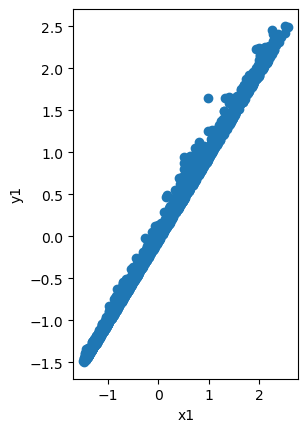

In [11]:
plt.subplot(121)
plt.scatter(x[:,0], x[:,1])
plt.xlabel('x1')
plt.ylabel('y1')

# HIERARCHICAL CLUSTERING

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import normalize

In [5]:
data = pd.read_csv('Daily_wheat_price.csv')
data.head()

,date,open,high,low,close
0,2018-03-12,488.50,492.75,483.00,490.00
1,2018-03-09,499.25,499.25,486.00,490.25
2,2018-03-08,497.50,502.50,490.25,499.25
3,2018-03-07,506.00,509.75,496.00,497.50
4,2018-03-06,507.00,507.50,495.50,506.00


In [6]:
x = data.drop(columns='date',axis=1)


In [7]:
data=x
data_scaled = data
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,open,high,low,close
0,488.50,492.75,483.00,490.00
1,499.25,499.25,486.00,490.25
2,497.50,502.50,490.25,499.25
3,506.00,509.75,496.00,497.50
4,507.00,507.50,495.50,506.00


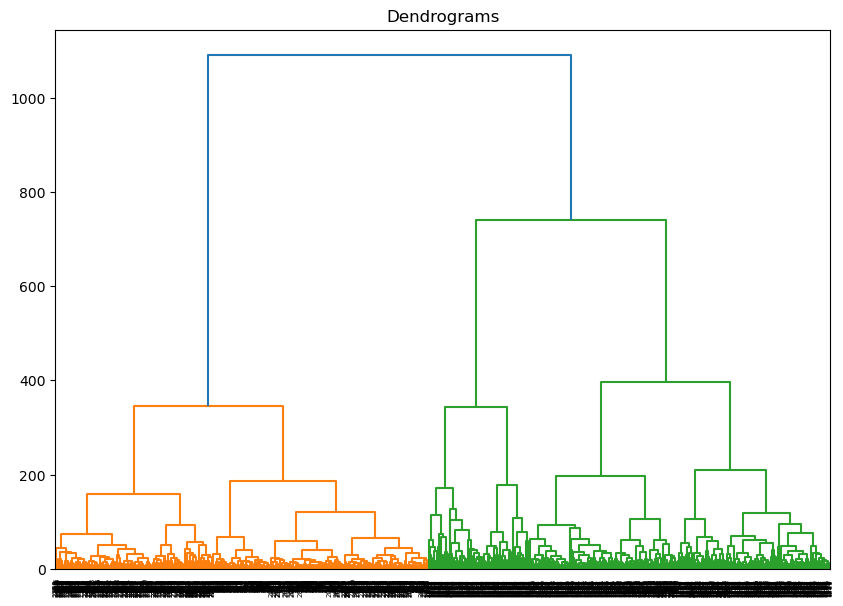

In [8]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method = 'complete'))

In [9]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters= 2, affinity='euclidean', linkage='complete')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

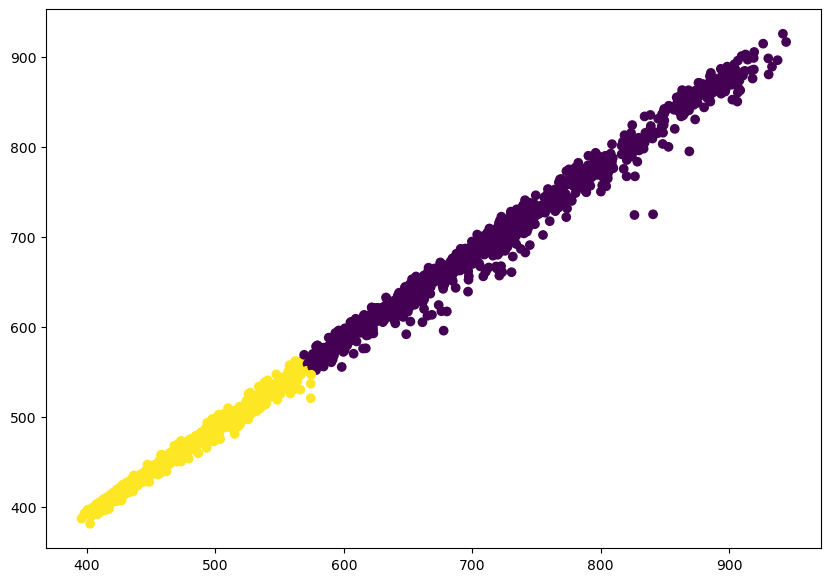

In [10]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['high'],data_scaled['low'], c=cluster.labels_)